In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Classification Model:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


This is our overall dataset where we have 907 rows and 27 columns. our dataset have many null values, data contain both integer and object data.I can see here some columns are not useful for us like, country_long,url,wepp_id,geolocation source, so i will remove those columns becasue country_long its just a long form for country,wepp_id is not also useful as its just a id. source and url are also not useful.primary fuel and capacity these two are our target variables.while making prediction for capacity we will have to make regression model and for primary classification model.

In [3]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [4]:
df.shape

(907, 27)

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

these are column names in the data

In [6]:
df.source

0      National Renewable Energy Laboratory
1                      Ultratech Cement ltd
2                                       CDM
3             Central Electricity Authority
4             Central Electricity Authority
                       ...                 
902           Central Electricity Authority
903     Karnataka Power Corporation Limited
904                                     CDM
905                      Hindustan Zinc ltd
906                                     CDM
Name: source, Length: 907, dtype: object

In [7]:
df.describe()


,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


this is the statastical information for the data where we have min max numbers in columns and mean and std deviation for each column. here 1 coumun named other fule3,generation-2013 and generation 2019 and estimated generatoion are  empty we will drop that coulmn.

In [8]:
df. drop(columns = ['gppd_idnr','url','country','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
                    'generation_gwh_2019','estimated_generation_gwh'], axis=1,inplace=True)
df

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


here I have dropped the columns which were not useful

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            907 non-null    object 
 1   name                    907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                861 non-null    float64
 4   longitude               861 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   other_fuel1             198 non-null    object 
 7   commissioning_year      527 non-null    float64
 8   owner                   342 non-null    object 
 9   source                  907 non-null    object 
 10  geolocation_source      888 non-null    object 
 11  year_of_capacity_data   519 non-null    float64
 12  generation_gwh_2014     398 non-null    float64
 13  generation_gwh_2015     422 non-null    float64
 14  generation_gwh_2016     434 non-null    fl

here we can see all columns which contain object data

In [10]:
df.isnull().sum()

country_long                0
name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

here we can see the NAN Count for each column.

for the columns longtitude and latitude we cannot replace the null values. so we will have to drop that rows

In [11]:
df.dropna(subset =['latitude','longitude'],how='all',inplace=True) 
df

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.reset_index()

,index,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
857,903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns

Index(['country_long', 'name', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

# DATA VISIUVALIZATION:

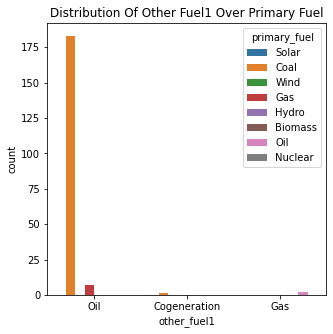

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'], hue=df['primary_fuel'])
plt.title('Distribution Of Other Fuel1 Over Primary Fuel')
plt.show()

this the distribution of other fuels like oil and gas over primary fuel.

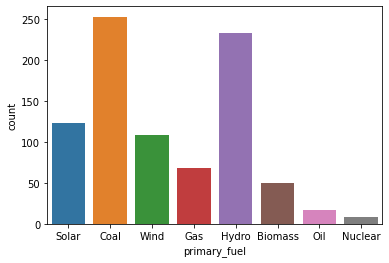

In [16]:
sns.countplot(df['primary_fuel']);

This the distribution of the primary fuel which is our target vraibale. Coal is used highly as primary fuel.

One thing I noticed here that owner, source and and geolocation source and generation dta source this columns are not useful as its just giving the source name from the information collected. So I will drop this columns as well.

In [17]:
df = df.drop(['source','geolocation_source','generation_data_source','year_of_capacity_data'],axis=1)

In [18]:
df

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


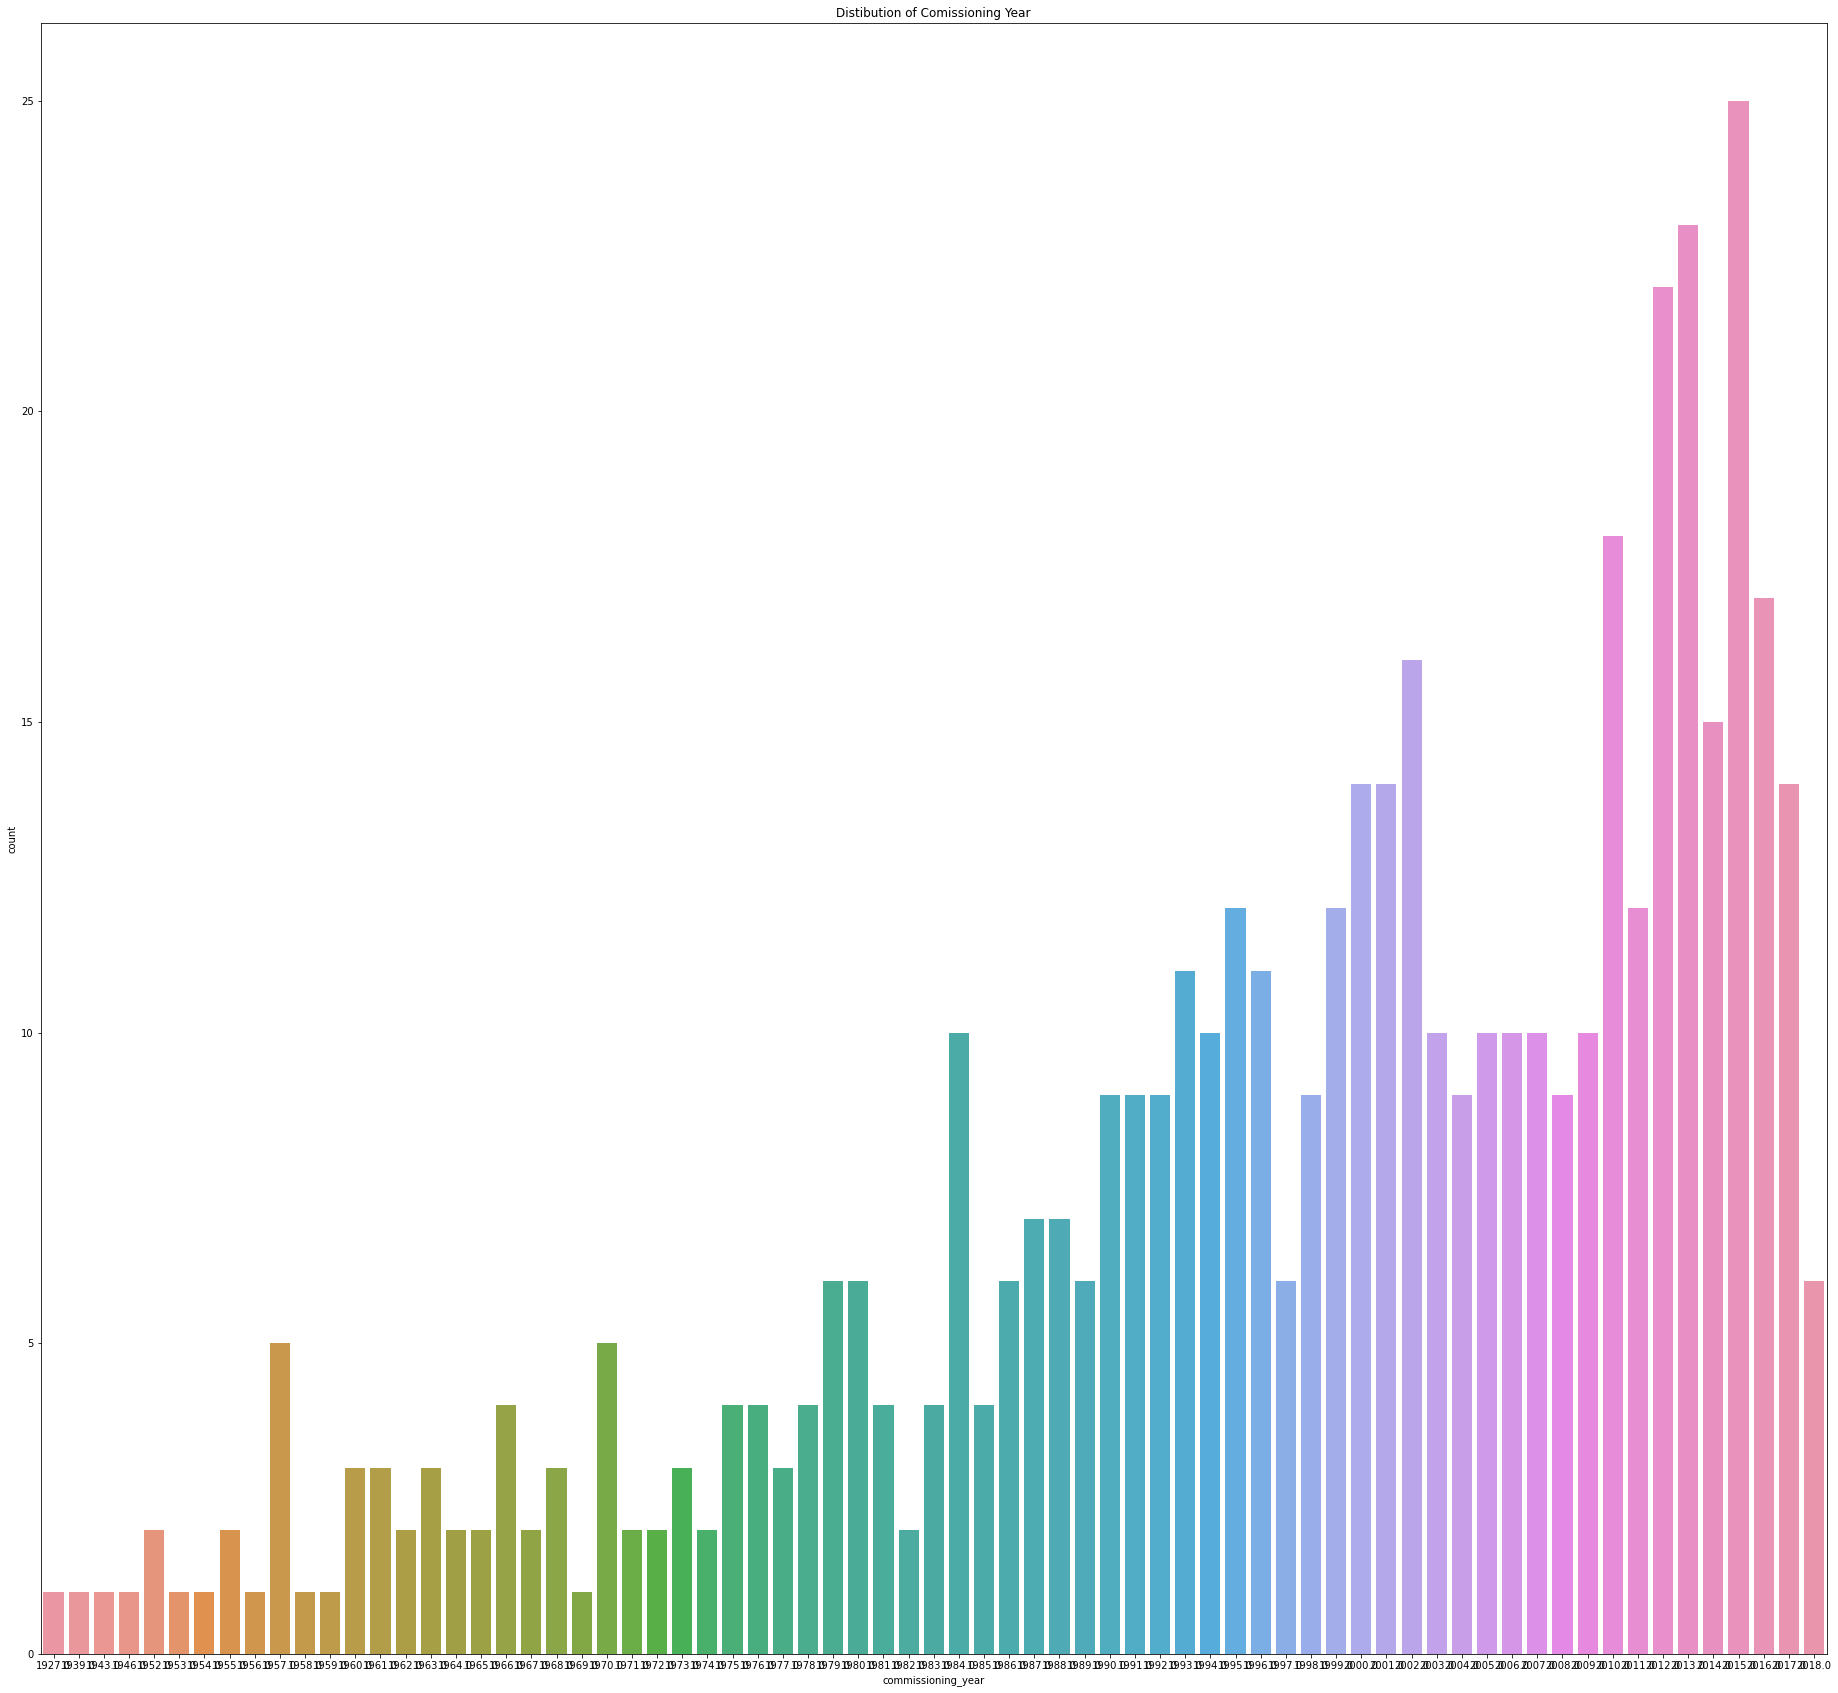

In [19]:
plt.figure(figsize=(32,30))
sns.countplot(df['commissioning_year']) 
plt.title('Distibution of Comissioning Year')
plt.show()

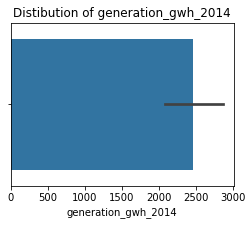

In [20]:
plt.figure(figsize=(4,3))
sns.barplot(df['generation_gwh_2014']) 
plt.title('Distibution of generation_gwh_2014')
plt.show()

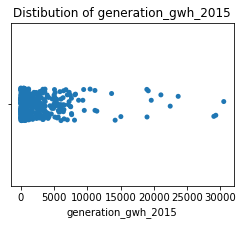

In [21]:
plt.figure(figsize=(4,3))
sns.stripplot(df['generation_gwh_2015']) 
plt.title('Distibution of generation_gwh_2015')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [23]:
df

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,0,2.5,28.1839,73.2407,6,3,2011.0,221,NaN,NaN,NaN,NaN,NaN
1,0,1,98.0,24.7663,74.6090,1,3,NaN,249,NaN,NaN,NaN,NaN,NaN
2,0,2,39.2,21.9038,69.3732,7,3,NaN,2,NaN,NaN,NaN,NaN,NaN
3,0,3,135.0,23.8712,91.3602,2,3,2004.0,271,617.789264,843.747000,886.004428,663.774500,626.239128
4,0,4,1800.0,21.9603,82.4091,1,2,2015.0,271,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,856,1600.0,16.2949,77.3568,1,2,2016.0,271,NaN,0.994875,233.596650,865.400000,686.500000
903,0,857,3.0,12.8932,78.1654,6,3,NaN,110,NaN,NaN,NaN,NaN,NaN
904,0,858,25.5,15.2758,75.5811,7,3,NaN,271,NaN,NaN,NaN,NaN,NaN
905,0,859,80.0,24.3500,73.7477,1,3,NaN,88,NaN,NaN,NaN,NaN,NaN


In [24]:
df.isnull().sum()

country_long             0
name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year     365
owner                    0
generation_gwh_2014    469
generation_gwh_2015    447
generation_gwh_2016    437
generation_gwh_2017    433
generation_gwh_2018    425
dtype: int64

In [25]:
df['commissioning_year'] = df['commissioning_year'].fillna( df['commissioning_year'].dropna().mode().values[0] )
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna( df['generation_gwh_2014'].dropna().mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna( df['generation_gwh_2015'].dropna().mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna( df['generation_gwh_2016'].dropna().mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna( df['generation_gwh_2017'].dropna().mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna( df['generation_gwh_2018'].dropna().mean())

In [26]:
df.isnull().sum()

country_long           0
name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

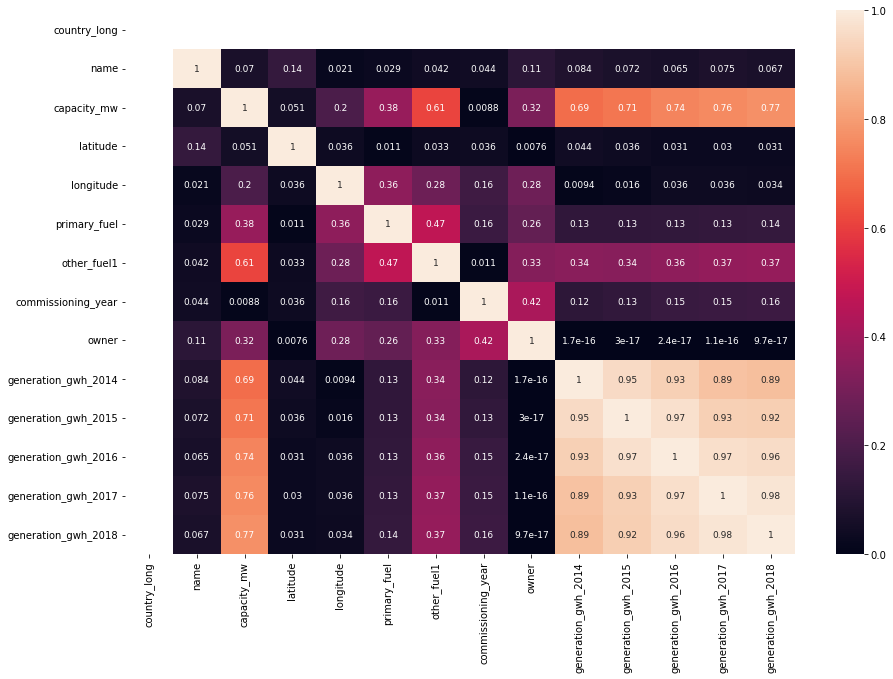

In [27]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

from above heatmap primary fuel is highly corelated with other fuel 1 and capacity mw is also corealted with each feature.

In [28]:
df.skew()

country_long           0.000000
name                   0.000000
capacity_mw            3.037191
latitude              -0.145866
longitude              1.112646
primary_fuel           0.507576
other_fuel1           -1.591158
commissioning_year    -1.683585
owner                 -1.346879
generation_gwh_2014    4.909400
generation_gwh_2015    5.231201
generation_gwh_2016    4.942474
generation_gwh_2017    4.985870
generation_gwh_2018    4.815931
dtype: float64

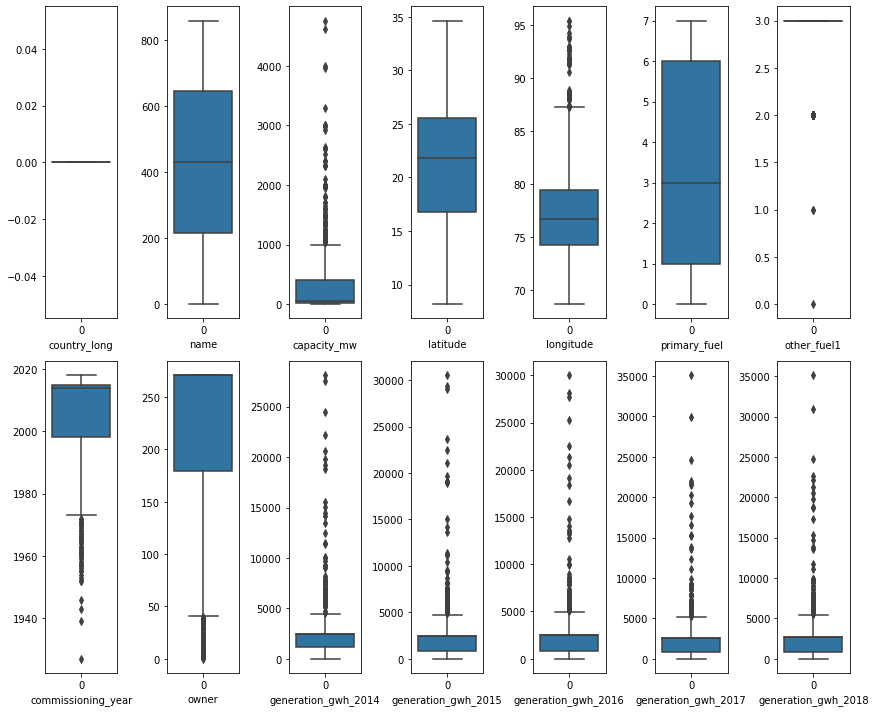

In [29]:
plt.figure(figsize =(12,10),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(2,7,plotnumber)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize =10)

    plotnumber+=1
plt.tight_layout()

In [30]:
from sklearn.preprocessing import power_transform

In [31]:
X= df.drop(columns= ['primary_fuel'])
y = df['primary_fuel']

In [32]:
X

,country_long,name,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,0,2.5,28.1839,73.2407,3,2011.0,221,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
1,0,1,98.0,24.7663,74.6090,3,2015.0,249,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
2,0,2,39.2,21.9038,69.3732,3,2015.0,2,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
3,0,3,135.0,23.8712,91.3602,3,2004.0,271,617.789264,843.747000,886.004428,663.774500,626.239128
4,0,4,1800.0,21.9603,82.4091,2,2015.0,271,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,856,1600.0,16.2949,77.3568,2,2016.0,271,2467.075507,0.994875,233.596650,865.400000,686.500000
903,0,857,3.0,12.8932,78.1654,3,2015.0,110,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
904,0,858,25.5,15.2758,75.5811,3,2015.0,271,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
905,0,859,80.0,24.3500,73.7477,3,2015.0,88,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790


In [33]:
X_new = power_transform(X)
X_new

array([[ 0.        , -2.16449311, -1.69929917, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        , -2.14480318,  0.15113225, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        , -2.12790683, -0.33202128, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       ...,
       [ 0.        ,  1.54811403, -0.55929908, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        ,  1.5512062 ,  0.0445372 , ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        ,  1.55429732, -0.78807982, ...,  0.32115714,
         0.31576266,  0.3251058 ]])

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report

In [37]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.6994219653179191 random_state 0
accuracy 0.6994219653179191 random_state 0
accuracy 0.7283236994219653 random_state 1
accuracy 0.7283236994219653 random_state 1
accuracy 0.7167630057803468 random_state 2
accuracy 0.7630057803468208 random_state 3
accuracy 0.7630057803468208 random_state 3
accuracy 0.7052023121387283 random_state 4
accuracy 0.7572254335260116 random_state 5
accuracy 0.7572254335260116 random_state 6
accuracy 0.8092485549132948 random_state 7
accuracy 0.8092485549132948 random_state 7
accuracy 0.7803468208092486 random_state 8
accuracy 0.7687861271676301 random_state 9
accuracy 0.7225433526011561 random_state 10
accuracy 0.7341040462427746 random_state 11
accuracy 0.7398843930635838 random_state 12
accuracy 0.7572254335260116 random_state 13
accuracy 0.7341040462427746 random_state 14
accuracy 0.6763005780346821 random_state 15
accuracy 0.7167630057803468 random_state 16
accuracy 0.7052023121387283 random_state 17
accuracy 0.7167630057803468 random_state 18
ac

In [38]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.8092485549132948 Random State 7


In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.8092485549132948
              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.95      0.88      0.91        48
           2       0.40      0.31      0.35        13
           3       0.90      0.96      0.93        48
           4       0.25      0.25      0.25         4
           5       0.50      1.00      0.67         1
           6       0.96      0.79      0.87        29
           7       0.64      0.86      0.73        21

    accuracy                           0.81       173
   macro avg       0.64      0.70      0.65       173
weighted avg       0.82      0.81      0.81       173



In [40]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.8323699421965318
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.85      0.94      0.89        48
           2       0.83      0.38      0.53        13
           3       0.87      1.00      0.93        48
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.89      0.86      0.88        29
           7       0.76      0.76      0.76        21

    accuracy                           0.83       173
   macro avg       0.60      0.56      0.57       173
weighted avg       0.81      0.83      0.81       173



In [41]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.7456647398843931
              precision    recall  f1-score   support

           0       0.29      0.22      0.25         9
           1       0.86      0.92      0.89        48
           2       0.50      0.08      0.13        13
           3       0.81      0.98      0.89        48
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.79      0.76      0.77        29
           7       0.48      0.62      0.54        21

    accuracy                           0.75       173
   macro avg       0.47      0.45      0.43       173
weighted avg       0.71      0.75      0.71       173



In [42]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.5028901734104047
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.92      0.25      0.39        48
           2       0.21      0.54      0.30        13
           3       0.81      0.98      0.89        48
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.80      0.28      0.41        29
           7       0.23      0.62      0.34        21

    accuracy                           0.50       173
   macro avg       0.37      0.33      0.29       173
weighted avg       0.66      0.50      0.49       173



In [43]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.8092485549132948
              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.84      0.96      0.89        48
           2       0.75      0.46      0.57        13
           3       0.87      0.98      0.92        48
           4       0.00      0.00      0.00         4
           5       0.50      1.00      0.67         1
           6       0.81      0.76      0.79        29
           7       0.78      0.67      0.72        21

    accuracy                           0.81       173
   macro avg       0.63      0.66      0.63       173
weighted avg       0.79      0.81      0.79       173



In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.7341040462427746
              precision    recall  f1-score   support

           0       0.33      0.44      0.38         9
           1       0.86      0.90      0.88        48
           2       0.33      0.08      0.12        13
           3       0.82      0.96      0.88        48
           4       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         1
           6       0.77      0.69      0.73        29
           7       0.48      0.57      0.52        21

    accuracy                           0.73       173
   macro avg       0.57      0.49      0.49       173
weighted avg       0.72      0.73      0.71       173



Random Forest Classifier is giving best accuracy score which is 84%. I will check cross valiation score for this model.

In [45]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rt,X_scaled,y,cv=5)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.8141618497109826


model is overfitting as its giving cross validation score 81% which is good as our was giving 84% acuracy.so i will apply hyperparameter tuning on randomforest classifier.

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':[3,4,6,7,5,8,9]}


In [47]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [48]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [49]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [50]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8323699421965318

my model is 83% accuracy after applying hyperparameter tuning. now i am saving this model as the final model

In [51]:
import joblib
joblib.dump(GCV.best_estimator_,'global power plant-primary fuel model.pkl ')

['global power plant-primary fuel model.pkl ']

 Till now I have build classfication model using primary fuel as target variable.

now I am going to build another regression model on same dataset using capacity mw as target vraible.

# REGRESSION MODEL:

In [2]:
df2 = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df2.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


This is our overall dataset where we have 907 rows and 27 columns. our dataset have many null values, data contain both integer and object data.I can see here some columns are not useful for us like, country_long,url,wepp_id,geolocation source, so i will remove those columns becasue country_long its just a long form for country,wepp_id is not also useful as its just a id. source and url are also not useful.capacity is our target variable.

In [3]:
df2. drop(columns = ['gppd_idnr','url','country','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
                    'generation_gwh_2019','estimated_generation_gwh'], axis=1,inplace=True)
df2

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.dropna(subset =['latitude','longitude'],how='all',inplace=True) 
df2

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.reset_index()

,index,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
857,903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA VISIUVALIZATION:

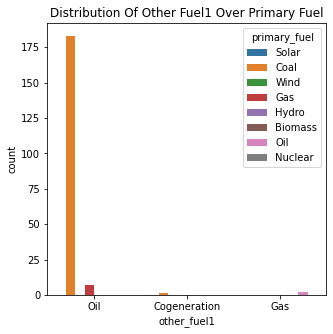

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(df2['other_fuel1'], hue=df2['primary_fuel'])
plt.title('Distribution Of Other Fuel1 Over Primary Fuel')
plt.show()

this the distribution of other fuels like oil and gas over primary fuel.

In [7]:
df2 = df2.drop(['source','geolocation_source','generation_data_source','year_of_capacity_data'],axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

for column in df2.columns:
    if df2[column].dtype == np.number:
        continue
    df2[column] = LabelEncoder().fit_transform(df2[column])

In [9]:
df2

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,0,2.5,28.1839,73.2407,6,3,2011.0,221,NaN,NaN,NaN,NaN,NaN
1,0,1,98.0,24.7663,74.6090,1,3,NaN,249,NaN,NaN,NaN,NaN,NaN
2,0,2,39.2,21.9038,69.3732,7,3,NaN,2,NaN,NaN,NaN,NaN,NaN
3,0,3,135.0,23.8712,91.3602,2,3,2004.0,271,617.789264,843.747000,886.004428,663.774500,626.239128
4,0,4,1800.0,21.9603,82.4091,1,2,2015.0,271,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,856,1600.0,16.2949,77.3568,1,2,2016.0,271,NaN,0.994875,233.596650,865.400000,686.500000
903,0,857,3.0,12.8932,78.1654,6,3,NaN,110,NaN,NaN,NaN,NaN,NaN
904,0,858,25.5,15.2758,75.5811,7,3,NaN,271,NaN,NaN,NaN,NaN,NaN
905,0,859,80.0,24.3500,73.7477,1,3,NaN,88,NaN,NaN,NaN,NaN,NaN


In [10]:
df2['commissioning_year'] = df2['commissioning_year'].fillna( df2['commissioning_year'].dropna().mode().values[0] )
df2['generation_gwh_2014'] = df2['generation_gwh_2014'].fillna( df2['generation_gwh_2014'].dropna().mean())
df2['generation_gwh_2015'] = df2['generation_gwh_2015'].fillna( df2['generation_gwh_2015'].dropna().mean())
df2['generation_gwh_2016'] = df2['generation_gwh_2016'].fillna( df2['generation_gwh_2016'].dropna().mean())
df2['generation_gwh_2017'] = df2['generation_gwh_2017'].fillna( df2['generation_gwh_2017'].dropna().mean())
df2['generation_gwh_2018'] = df2['generation_gwh_2018'].fillna( df2['generation_gwh_2018'].dropna().mean())

In [11]:
df2.isnull().sum()

country_long           0
name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

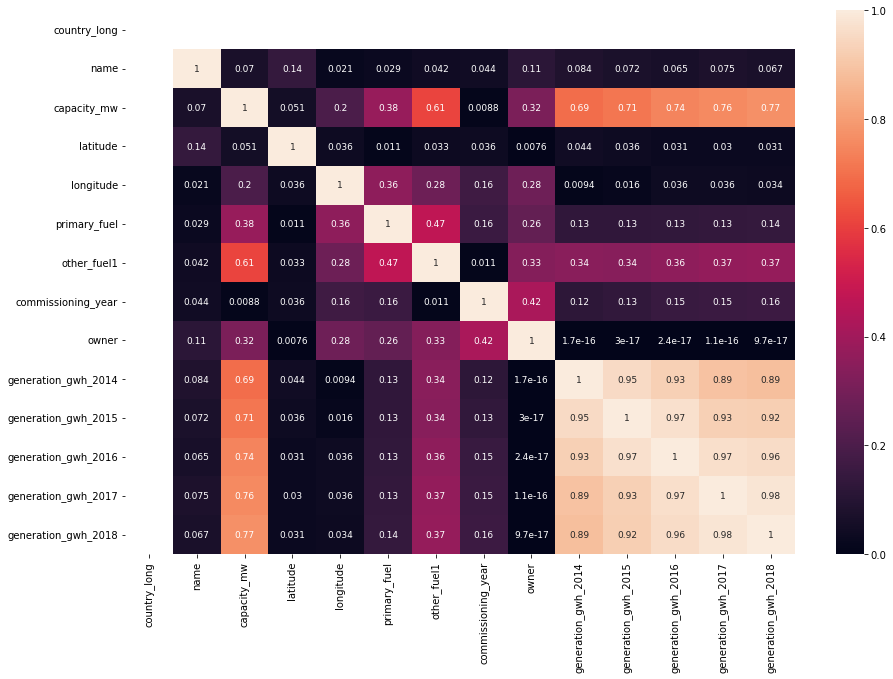

In [12]:
df2_corr = df2.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df2_corr,annot = True, annot_kws={'size':9})
plt.show()

In [13]:
df2.skew()

country_long           0.000000
name                   0.000000
capacity_mw            3.037191
latitude              -0.145866
longitude              1.112646
primary_fuel           0.507576
other_fuel1           -1.591158
commissioning_year    -1.683585
owner                 -1.346879
generation_gwh_2014    4.909400
generation_gwh_2015    5.231201
generation_gwh_2016    4.942474
generation_gwh_2017    4.985870
generation_gwh_2018    4.815931
dtype: float64

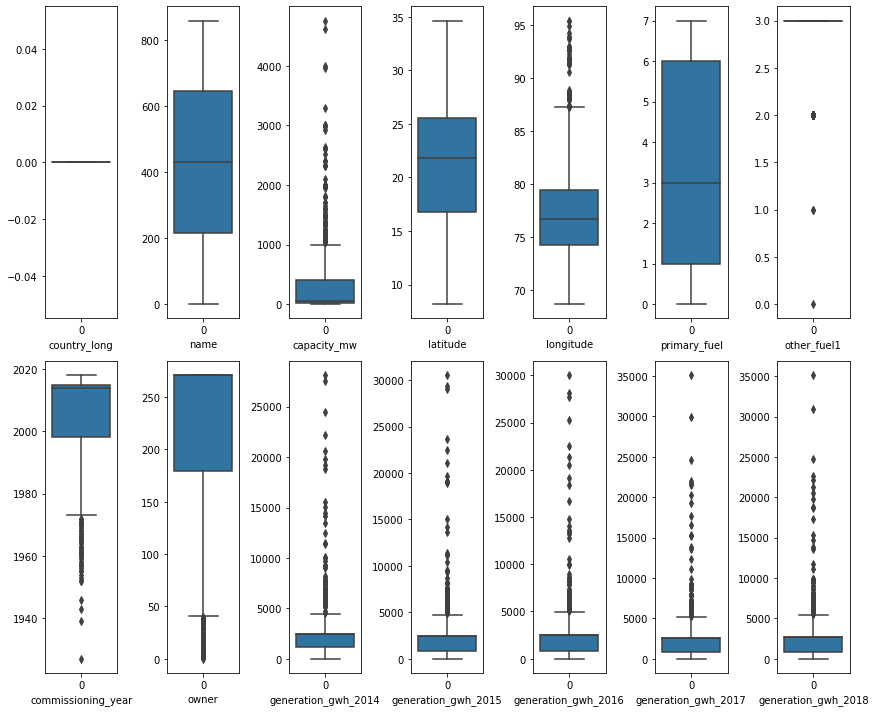

In [14]:
plt.figure(figsize =(12,10),facecolor='white')
plotnumber = 1

for column in df2:
    if plotnumber<=14:
        ax = plt.subplot(2,7,plotnumber)
        sns.boxplot(data = df2[column])
        plt.xlabel(column,fontsize =10)

    plotnumber+=1
plt.tight_layout()

In [15]:
from sklearn.preprocessing import power_transform

In [17]:
X= df2.drop(columns= ['primary_fuel'])
y= df2['primary_fuel']

In [18]:
X_new = power_transform(X)
X_new

array([[ 0.        , -2.16449311, -1.69929917, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        , -2.14480318,  0.15113225, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        , -2.12790683, -0.33202128, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       ...,
       [ 0.        ,  1.54811403, -0.55929908, ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        ,  1.5512062 ,  0.0445372 , ...,  0.32115714,
         0.31576266,  0.3251058 ],
       [ 0.        ,  1.55429732, -0.78807982, ...,  0.32115714,
         0.31576266,  0.3251058 ]])

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score

In [25]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.3314112375203775 random_state 0
accuracy 0.3314112375203775 random_state 0
accuracy 0.39732946362595034 random_state 1
accuracy 0.39732946362595034 random_state 1
accuracy 0.3233321822368701 random_state 2
accuracy 0.41264870581409063 random_state 3
accuracy 0.41264870581409063 random_state 3
accuracy 0.3628908541146214 random_state 4
accuracy 0.38669681398923705 random_state 5
accuracy 0.4559868501504144 random_state 6
accuracy 0.4559868501504144 random_state 6
accuracy 0.37805866048722503 random_state 7
accuracy 0.44885234117283024 random_state 8
accuracy 0.4462099974567586 random_state 9
accuracy 0.471533412500901 random_state 10
accuracy 0.471533412500901 random_state 10
accuracy 0.38626696335882593 random_state 11
accuracy 0.33971522770481255 random_state 12
accuracy 0.4453539316853373 random_state 13
accuracy 0.3858721841662829 random_state 14
accuracy 0.3458306051962934 random_state 15
accuracy 0.3309269376062528 random_state 16
accuracy 0.3362406058471942 random_stat

In [26]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.5156446180047103 Random State 155


In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('accuracy',r2_score(y_test,predt))

accuracy 0.422433130878514


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rt =  RandomForestRegressor()
rt.fit(x_train,y_train)
predrt = rt.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.659827978775039


In [32]:
from sklearn.svm import SVR

In [33]:
svr =  SVR()
svr.fit(x_train,y_train)
predrt = svr.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.5646186620536029


In [34]:
from sklearn.ensemble import AdaBoostRegressor

In [35]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)
predrt = ad.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.5727855366334738


In [36]:
from sklearn.ensemble import BaggingRegressor

In [37]:
bg = BaggingRegressor()
bg.fit(x_train,y_train)
predrt = bg.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.6939236006349123


here baggingregressor  and random forest regressor is giving highest accuracy so i will check cross validation score for this two models

# CROSS VALIDATION:

In [41]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rt,X_scaled,y,cv=5)
print("Cross Validation Score for Decision Tree Regressor is:-",scr.mean())

Cross Validation Score for Decision Tree Regressor is:- 0.6622330990309512


In [39]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(bg,X_scaled,y,cv=3)
print("Cross Validation Score for Bagging classifier Ref is:-",scr.mean())

Cross Validation Score for Bagging classifier Ref is:- 0.5911350597740459


here random forest classifier is giving highest cross validation score. I will apply now hyperparameter tuning to randomforest 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rlf = GridSearchCV(rt,parameters)
rlf.fit(x_train,y_train)

print(rlf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [44]:
rt=RandomForestRegressor(criterion = 'mae',max_features='auto')
rt.fit(x_train,y_train)
rt.score(x_train,y_train)
pred_y = rt.predict(x_test)


rfs = r2_score(y_test,pred_y)
print('R2 Socore:', rfs*100)

rfscore = cross_val_score(rt,X_new,y,cv=3)
rfc= rfscore.mean()
print('cross validation score:',rfc*100)

R2 Socore: 67.66761376605318
cross validation score: 62.89081370807433


its giving 67% accuracy after applying hyperparmeter tuning.